In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dividing India into 6 zones

india_zones = {
    "Northern Zone": {
        "States": ["Haryana", "Himachal Pradesh", "Punjab", "Rajasthan", "Uttarakhand", "Uttar Pradesh"],
        "Union Territories": ["Delhi NCR", "Ladakh", "Jammu And Kashmir", "Chandigarh"]
    },
    "Southern Zone": {
        "States": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"],
        "Union Territories": ["Puducherry", "Lakshadweep", "Andaman And Nicobar"]
    },
    "Eastern Zone": {
        "States": ["Bihar", "Jharkhand", "Odisha", "West Bengal"]
    },
    "Western Zone": {
        "States": ["Goa", "Gujarat", "Maharashtra"],
        "Union Territories": ["Dadra and Nagar Haveli", "Daman and Diu"]
    },
    "Central Zone": {
        "States": ["Chhattisgarh", "Madhya Pradesh"]
    },
    "North-Eastern Zone": {
        "States": ["Arunachal Pradesh", "Assam", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Tripura", "Sikkim"]
    }
}

# Accessing the zones
for zone, divisions in india_zones.items():
    print(f"{zone}:")
    for division, places in divisions.items():
        print(f"  {division}: {', '.join(places)}")
    print()


Northern Zone:
  States: Haryana, Himachal Pradesh, Punjab, Rajasthan, Uttarakhand, Uttar Pradesh
  Union Territories: Delhi NCR, Ladakh, Jammu And Kashmir, Chandigarh

Southern Zone:
  States: Andhra Pradesh, Karnataka, Kerala, Tamil Nadu, Telangana
  Union Territories: Puducherry, Lakshadweep, Andaman And Nicobar

Eastern Zone:
  States: Bihar, Jharkhand, Odisha, West Bengal

Western Zone:
  States: Goa, Gujarat, Maharashtra
  Union Territories: Dadra and Nagar Haveli, Daman and Diu

Central Zone:
  States: Chhattisgarh, Madhya Pradesh

North-Eastern Zone:
  States: Arunachal Pradesh, Assam, Manipur, Meghalaya, Mizoram, Nagaland, Tripura, Sikkim



In [3]:
dataset10_path = 'Datasets\\Dataset10.csv'
data10 = pd.read_csv(dataset10_path)
data10

,State/UT,Unnamed: 1,Name of the Culture & DST Laboratory,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,Public,"IRL, Visakhaptnam",Available,Certified,Certified,Certified,Certified
1,Andhra Pradesh,Public,"C&DST Laboratory, SMC, Vijayawada",Available,Not Certified,Not Certified,Not Certified,Not Certified
2,Andhra Pradesh,Public,"C&DST Laboratory, DTRC(DFIT),Nellore,A.P",Not Available,Not Certified,Not Certified,Certified,Certified
3,Andhra Pradesh,Public,"C&DST Laboratory, RDT Hospital, Bathalapalli",Available,Certified,Not Certified,Certified,Certified
4,Assam,Public,IRL Guwahati,Available,Certified,Certified,Certified,Certified
...,...,...,...,...,...,...,...,...
92,Tamil Nadu,Private,"Vision Research Fondation laboratory, Shakar N...",Available,Certified,Not Certified,Not Certified,Not Certified
93,Uttar Pradesh,Private,"Subharti Medical College, Meerut",Not Available,Not Certified,Not Certified,Certified,Not Certified
94,Uttar Pradesh,Private,"Shri Ram Murti Smarak Institutions, Bareilly",Available,Not Certified,Not Certified,Not Certified,Not Certified
95,West Bengal,Private,"SRL Diagnsotics, Kolkata",Available,Certified,Not Certified,Not Certified,Not Certified


In [4]:
print('Columns in the dataset:', data10.columns)

Columns in the dataset: Index(['State/UT', 'Unnamed: 1', 'Name of the Culture & DST Laboratory',
       'Liquid culture', 'FL LCDST', 'SL LCDST', 'FL LPA', 'SL LPA'],
      dtype='object')


In [5]:
# Check unique values of 'Unnamed: 1' column
print('Unique values in Unnamed: 1 column:', data10['Unnamed: 1'].unique())

Unique values in Unnamed: 1 column: ['Public' 'Private']


In [6]:
# Update column name
# replace 'Unnamed: 1' to 'Public/Private' column name
data10.rename(columns={'Unnamed: 1': 'Public/Private'}, inplace=True)
data10.columns

Index(['State/UT', 'Public/Private', 'Name of the Culture & DST Laboratory',
       'Liquid culture', 'FL LCDST', 'SL LCDST', 'FL LPA', 'SL LPA'],
      dtype='object')

In [7]:
# Checking for missing values
print('Missing values in the dataset:', data10.isnull().sum())

Missing values in the dataset: State/UT                                0
Public/Private                          0
Name of the Culture & DST Laboratory    0
Liquid culture                          0
FL LCDST                                0
SL LCDST                                0
FL LPA                                  0
SL LPA                                  1
dtype: int64


In [8]:
# Check for the missing value data row of the 'SL LPA' column
data10[data10['SL LPA'].isnull()]

,State/UT,Public/Private,Name of the Culture & DST Laboratory,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
49,Punjab,Public,"C&DST Laboratory,Guru Gobind Singh Medical Col...",Available,Not Certified,Not Certified,Not Certified,NaN


In [9]:
# Updating the missing value data row of the 'SL LPA' column to 'Not Certified'
# based on the different column values
data10.loc[data10['SL LPA'].isnull(), 'SL LPA'] = 'Not Certified'

# Checking for missing values
print('Missing values in the dataset:', data10.isnull().sum())

Missing values in the dataset: State/UT                                0
Public/Private                          0
Name of the Culture & DST Laboratory    0
Liquid culture                          0
FL LCDST                                0
SL LCDST                                0
FL LPA                                  0
SL LPA                                  0
dtype: int64


Since we are concerned about the central government schemes, we will focus on the public laboratories.

In [10]:
public_labs = data10.get(data10['Public/Private'] == 'Public')
public_labs

,State/UT,Public/Private,Name of the Culture & DST Laboratory,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,Public,"IRL, Visakhaptnam",Available,Certified,Certified,Certified,Certified
1,Andhra Pradesh,Public,"C&DST Laboratory, SMC, Vijayawada",Available,Not Certified,Not Certified,Not Certified,Not Certified
2,Andhra Pradesh,Public,"C&DST Laboratory, DTRC(DFIT),Nellore,A.P",Not Available,Not Certified,Not Certified,Certified,Certified
3,Andhra Pradesh,Public,"C&DST Laboratory, RDT Hospital, Bathalapalli",Available,Certified,Not Certified,Certified,Certified
4,Assam,Public,IRL Guwahati,Available,Certified,Certified,Certified,Certified
...,...,...,...,...,...,...,...,...
75,Uttar Pradesh,Public,"C&DST Laboratory, BRD Medical College, Gorakhpur",Available,Not Certified,Not Certified,Certified,Not Certified
76,West Bengal,Public,"IRL, Kolkata West Bengal",Available,Certified,Certified,Certified,Certified
77,West Bengal,Public,"C&DST Laboratory, NBMC, West Bengal",Available,Certified,Certified,Certified,Certified
78,West Bengal,Public,"C&DST Laboratory, Burdwan Medical College, Bur...",Available,Not Certified,Not Certified,Certified,Certified


In [11]:
# Drop 'Public/Private' & 'Name of the Culture & DST Laboratory' columns
public_labs = public_labs.drop(columns=['Public/Private', 'Name of the Culture & DST Laboratory' ])
public_labs

,State/UT,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Andhra Pradesh,Available,Certified,Certified,Certified,Certified
1,Andhra Pradesh,Available,Not Certified,Not Certified,Not Certified,Not Certified
2,Andhra Pradesh,Not Available,Not Certified,Not Certified,Certified,Certified
3,Andhra Pradesh,Available,Certified,Not Certified,Certified,Certified
4,Assam,Available,Certified,Certified,Certified,Certified
...,...,...,...,...,...,...
75,Uttar Pradesh,Available,Not Certified,Not Certified,Certified,Not Certified
76,West Bengal,Available,Certified,Certified,Certified,Certified
77,West Bengal,Available,Certified,Certified,Certified,Certified
78,West Bengal,Available,Not Certified,Not Certified,Certified,Certified


In [12]:
# Explicitly define the Zone column as an object type
public_labs['Zone'] = pd.Series(dtype='object')

# Assign 'Zones' to each row in a separate column 'Zone'
for index, row in public_labs.iterrows():
    for zone, divisions in india_zones.items():
        for division, places in divisions.items():
            if row['State/UT'] in places:
                public_labs.at[index, 'Zone'] = zone
                break

# Reorder columns to move 'Zone' to the first position
cols = public_labs.columns.tolist()
cols = cols[-1:] + cols[:-1]
public_labs = public_labs[cols]

public_labs


,Zone,State/UT,Liquid culture,FL LCDST,SL LCDST,FL LPA,SL LPA
0,Southern Zone,Andhra Pradesh,Available,Certified,Certified,Certified,Certified
1,Southern Zone,Andhra Pradesh,Available,Not Certified,Not Certified,Not Certified,Not Certified
2,Southern Zone,Andhra Pradesh,Not Available,Not Certified,Not Certified,Certified,Certified
3,Southern Zone,Andhra Pradesh,Available,Certified,Not Certified,Certified,Certified
4,North-Eastern Zone,Assam,Available,Certified,Certified,Certified,Certified
...,...,...,...,...,...,...,...
75,Northern Zone,Uttar Pradesh,Available,Not Certified,Not Certified,Certified,Not Certified
76,Eastern Zone,West Bengal,Available,Certified,Certified,Certified,Certified
77,Eastern Zone,West Bengal,Available,Certified,Certified,Certified,Certified
78,Eastern Zone,West Bengal,Available,Not Certified,Not Certified,Certified,Certified


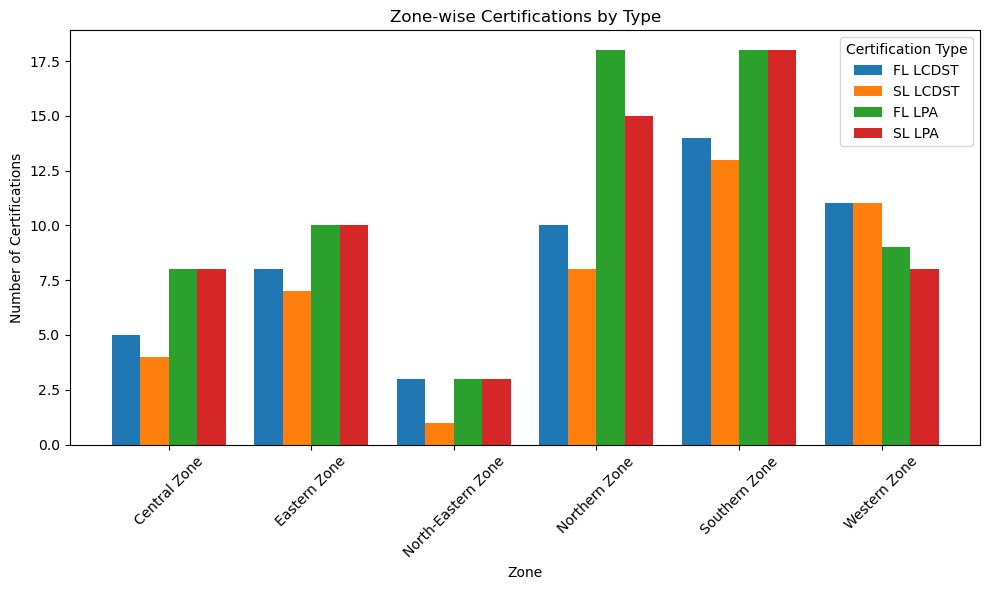

In [13]:
# Count certifications by Zone
certifications = public_labs.groupby('Zone')[['FL LCDST', 'SL LCDST', 'FL LPA', 'SL LPA']].apply(lambda x: (x == 'Certified').sum())

# Set up the bar width and positions
bar_width = 0.2
zones = certifications.index
x = np.arange(len(zones))

# Plotting each certification type as a separate bar
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, certifications['FL LCDST'], width=bar_width, label='FL LCDST')
plt.bar(x - 0.5 * bar_width, certifications['SL LCDST'], width=bar_width, label='SL LCDST')
plt.bar(x + 0.5 * bar_width, certifications['FL LPA'], width=bar_width, label='FL LPA')
plt.bar(x + 1.5 * bar_width, certifications['SL LPA'], width=bar_width, label='SL LPA')

# Customize the plot
plt.title('Zone-wise Certifications by Type')
plt.xlabel('Zone')
plt.ylabel('Number of Certifications')
plt.xticks(x, zones, rotation=45)
plt.legend(title='Certification Type')
plt.tight_layout()
plt.show()


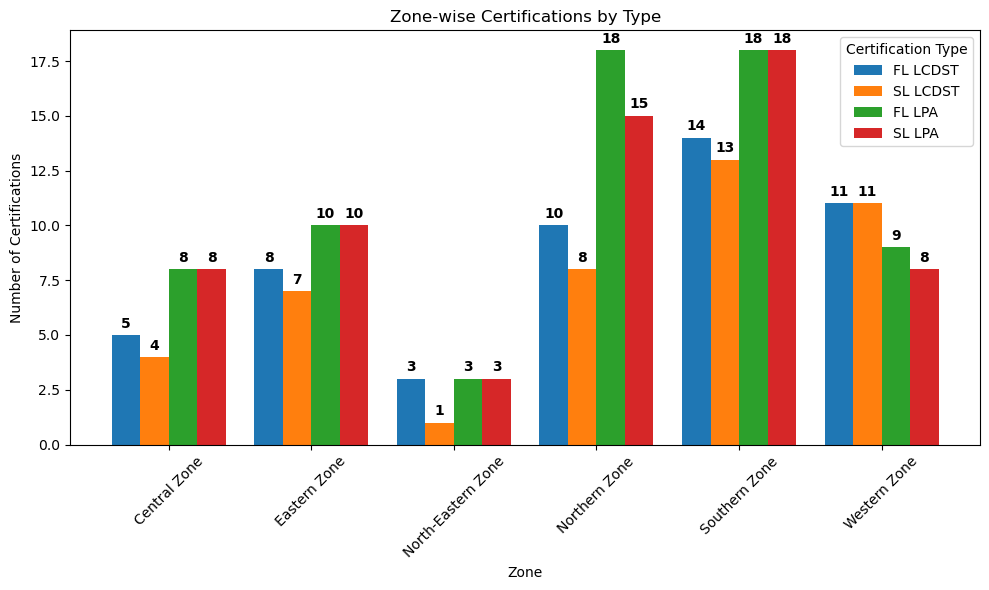

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `public_labs` is the DataFrame

# Count certifications by Zone
certifications = public_labs.groupby('Zone')[['FL LCDST', 'SL LCDST', 'FL LPA', 'SL LPA']].apply(lambda x: (x == 'Certified').sum())

# Set up the bar width and positions
bar_width = 0.2
zones = certifications.index
x = np.arange(len(zones))

# Plotting each certification type as a separate bar
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - 1.5 * bar_width, certifications['FL LCDST'], width=bar_width, label='FL LCDST')
bars2 = plt.bar(x - 0.5 * bar_width, certifications['SL LCDST'], width=bar_width, label='SL LCDST')
bars3 = plt.bar(x + 0.5 * bar_width, certifications['FL LPA'], width=bar_width, label='FL LPA')
bars4 = plt.bar(x + 1.5 * bar_width, certifications['SL LPA'], width=bar_width, label='SL LPA')

# Adding text labels on top of each bar
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, int(yval), ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title('Zone-wise Certifications by Type')
plt.xlabel('Zone')
plt.ylabel('Number of Certifications')
plt.xticks(x, zones, rotation=45)
plt.legend(title='Certification Type')
plt.tight_layout()
plt.show()


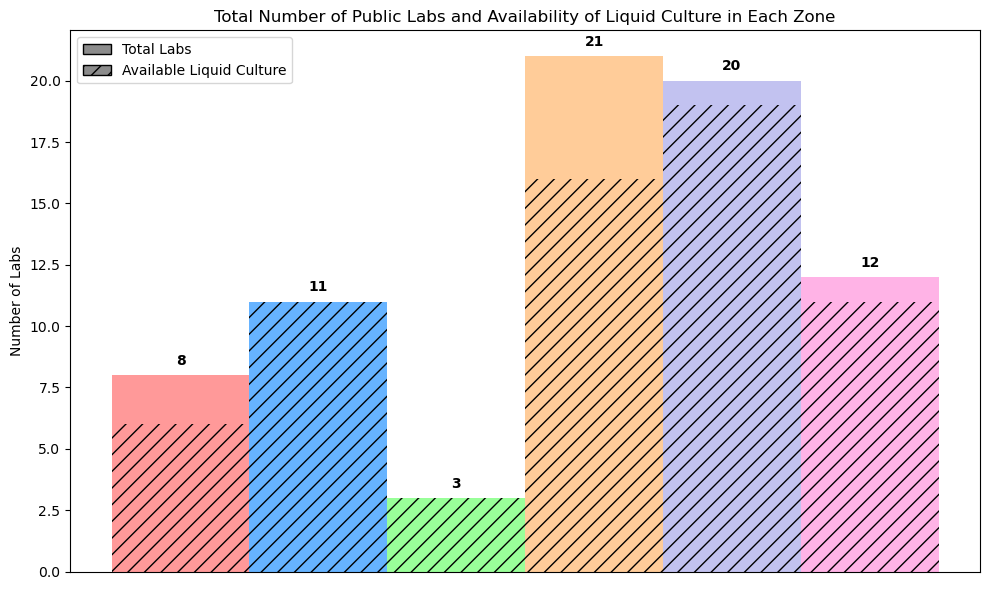

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming `public_labs` is the DataFrame

# Count the total number of labs and the availability of liquid culture by zone
total_labs = public_labs.groupby('Zone').size()
liquid_culture_availability = public_labs[public_labs['Liquid culture'] == 'Available'].groupby('Zone').size()

# Define zones in order and color palette
zones = ['Central Zone', 'Eastern Zone', 'North-Eastern Zone', 'Northern Zone', 'Southern Zone', 'Western Zone']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Ensure availability counts are aligned with total labs
availability_counts = [liquid_culture_availability.get(zone, 0) for zone in zones]
total_counts = [total_labs.get(zone, 0) for zone in zones]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each zone's bar with two segments
for i, (zone, color, total, available) in enumerate(zip(zones, colors, total_counts, availability_counts)):
    # Total bar
    plt.bar(zone, total, color=color, width=1.0)
    # Segment representing availability of liquid culture with a hatch pattern
    plt.bar(zone, available, color=color, width=1.0, hatch='//')
    
    # Display the total number at the top of each bar
    plt.text(i, total + 0.3, str(total), ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.title('Total Number of Public Labs and Availability of Liquid Culture in Each Zone')
plt.ylabel('Number of Labs')

# Remove x-axis labels
plt.xticks([], [])

# Create custom legend
legend_elements = [
    Patch(facecolor='#8c8c8c', edgecolor='black', label='Total Labs'),                # Grey color for "Total Labs"
    Patch(facecolor='#8c8c8c', edgecolor='black', hatch='//', label='Available Liquid Culture')  # Grey color with hatch for "Available Liquid Culture"
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


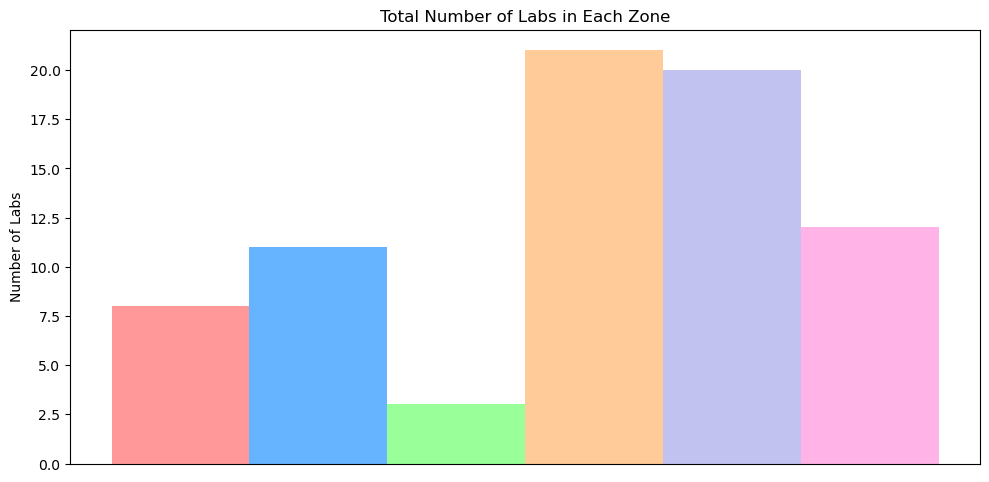

In [16]:
# total number of labs in each zone
total_labs = public_labs.groupby('Zone').size()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(total_labs.index, total_labs, color=colors, width=1)
plt.title('Total Number of Labs in Each Zone')
plt.ylabel('Number of Labs')
plt.xticks(rotation=45)
plt.tight_layout()
# Remove x-axis labels
plt.xticks([], [])
plt.show()


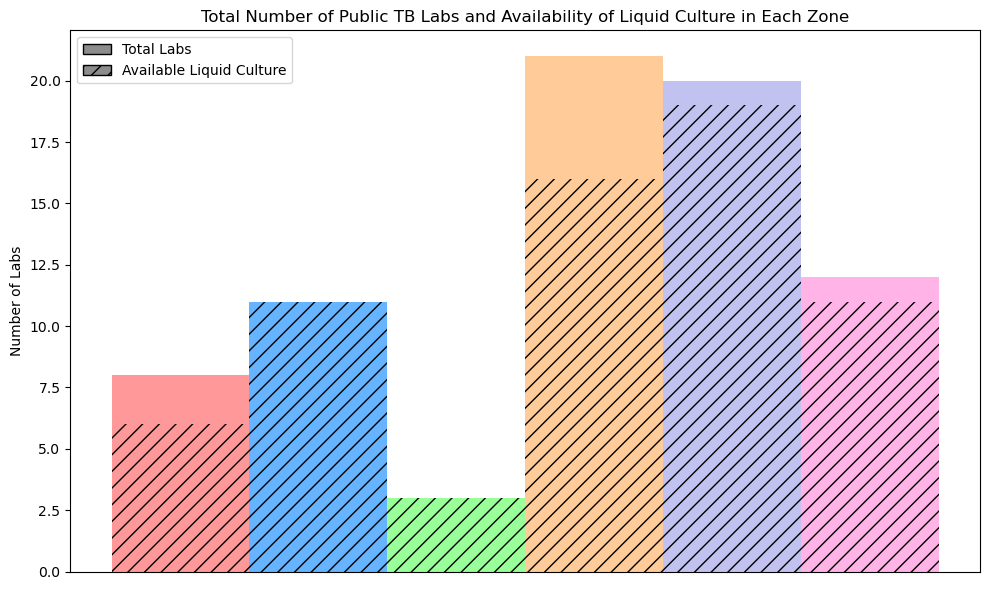

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming `public_labs` is the DataFrame

# Count the total number of labs and the availability of liquid culture by zone
total_labs = public_labs.groupby('Zone').size()
liquid_culture_availability = public_labs[public_labs['Liquid culture'] == 'Available'].groupby('Zone').size()

# Define zones in order and color palette
zones = ['Central Zone', 'Eastern Zone', 'North-Eastern Zone', 'Northern Zone', 'Southern Zone', 'Western Zone']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

# Ensure availability counts are aligned with total labs
availability_counts = [liquid_culture_availability.get(zone, 0) for zone in zones]
total_counts = [total_labs.get(zone, 0) for zone in zones]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each zone's bar with two segments
for i, (zone, color, total, available) in enumerate(zip(zones, colors, total_counts, availability_counts)):
    # Total bar
    plt.bar(zone, total, color=color, width=1.0)
    # Segment representing availability of liquid culture with a hatch pattern
    plt.bar(zone, available, color=color, width=1.0, hatch='//')

# Customize the plot
plt.title('Total Number of Public TB Labs and Availability of Liquid Culture in Each Zone')
plt.ylabel('Number of Labs')

# Remove x-axis labels
plt.xticks([], [])

# Create custom legend
legend_elements = [
    Patch(facecolor='#8c8c8c', edgecolor='black', label='Total Labs'),                # Grey color for "Total Labs"
    Patch(facecolor='#8c8c8c', edgecolor='black', hatch='//', label='Available Liquid Culture')  # Grey color with hatch for "Available Liquid Culture"
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()
